In [2]:
!pip install matplotlib
!pip install -e ..

You should consider upgrading via the 'd:\text-classifier\venv\scripts\python.exe -m pip install --upgrade pip' command.


Obtaining file:///D:/text-classifier
  Attempting uninstall: gzipclassifier
    Found existing installation: gzipclassifier 1.0.0
    Uninstalling gzipclassifier-1.0.0:
      Successfully uninstalled gzipclassifier-1.0.0
  Running setup.py develop for gzipclassifier


You should consider upgrading via the 'd:\text-classifier\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
from gzipclassifier.classifier import TextClassifier

In [2]:
train_data = pd.read_csv("..\\data\\train.csv").to_numpy()
test_data = pd.read_csv("..\\data\\test.csv").to_numpy()
train_data

array([[3, 'Wall St. Bears Claw Back Into the Black (Reuters)',
        "Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."],
       [3, 'Carlyle Looks Toward Commercial Aerospace (Reuters)',
        'Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.'],
       [3, "Oil and Economy Cloud Stocks' Outlook (Reuters)",
        'Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.'],
       ...,
       [2, 'Saban not going to Dolphins yet',
        "The Miami Dolphins will put their courtship of LSU coach Nick Saban on hold to comply with the NFL's hiring policy by interviewing at least one minority candidate, a team source told The Associated Press

In [3]:
TEST_SAMPLES = 30

X_train = train_data[:, 2]
y_train = train_data[:, 0]

X_test = test_data[:TEST_SAMPLES, 2]
y_test = test_data[:TEST_SAMPLES, 0]

In [4]:
gzip_classifier = TextClassifier(algorithm="gzip")
gzip_classifier.fit(X_train, y_train)

bz2_classifier = TextClassifier(algorithm="bz2")
bz2_classifier.fit(X_train, y_train)

In [9]:
gzip_y = gzip_classifier.predict(X_test)

In [11]:
bz2_y = bz2_classifier.predict(X_test)

In [12]:
gzip_accuracy = np.sum(gzip_y == y_test) / y_test.shape[0]
# lzma_accuracy = np.sum(lzma_y == y_test) / y_test.shape[0]
bz2_accuracy = np.sum(bz2_y == y_test) / y_test.shape[0]

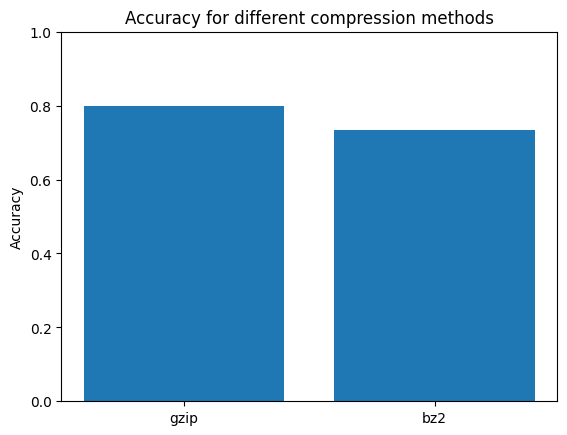

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
algorithms = "gzip", "bz2"
scores = gzip_accuracy, bz2_accuracy
ax.bar(algorithms, scores)

ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.set_title('Accuracy for different compression methods')

plt.show()